# Nigerian Housing Price Prediction Model
### 1. Overview
This project focuses on building and analyzing a machine learning model that predicts housing prices in Nigeria, with the aim of making property valuation more transparent and data-driven for citizens. Using real-world property listings and known prices, the model takes into account key features such as location, house type, number of bedrooms, and other relevant characteristics to estimate a property's market value. The entire process — from data collection and cleaning to exploratory analysis, feature engineering, and model training — is documented in this notebook. The goal is to help renters, buyers, real estate agents, and investors make more informed decisions by understanding what a house or rental property should cost based on its attributes.


### 2. Problem Statement
> "How can we accurately predict the price of a house or rental property in Nigerian cities based on features like location, number of rooms, property type, and amenities, to improve transparency and decision-making in the real estate market?"

In Nigeria, finding fair and accurate pricing for housing remains a difficult task due to the absence of centralized pricing data, regional disparities, and inconsistent listing standards. People searching for accommodation often rely on guesswork, agents, or outdated information — leading to overpricing, underpricing, and missed opportunities.

The goal of this project is to build a predictive model that can estimate the price of a property based on its features (such as location, number of bedrooms, property type, etc.). This model can be used to power apps or platforms that guide users in understanding what a house or apartment should cost, based on data rather than speculation.


### 3. Data/Features
The data used in this project were obtained from Kaggle. While it exists in this folder, here is a link to the site it was obtained: https://www.kaggle.com/datasets/abdullahiyunus/nigeria-houses-and-prices-dataset. The features contained in this dataset are as follows: 

- bedrooms -> number of bedrooms in the houses
- bathrooms -> number of bathrooms in the houses
- toilets -> number of toilets 
- parking_space
- title -> house type
- town -> town in which the house is located
- state -> state within Nigeria in which the house is located and finally
- price -> the target column.


### 4. Evaluation
In terms of evaluating the model created, three metrics have been chosen:
- R² Score (Coefficient of Determination)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)

### 5. Objectives


## Loading the dataset
 We will begin with importing the various necessary libraries and loading our datasets.

In [1]:
# Imporing the libraries

# Basic required libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

# Feature Engineering

# Data Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn import metrics

In [2]:
# Loading the dataset
df = pd.read_csv("dataset/nigeria_houses_data.csv")
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


## Exploratory Data Analysis

Now that our data has been loaded, we can explore and find insights in it.

In [3]:
# Dataset basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [4]:
# Checking for missing values
df.isna().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [5]:
df.describe(include= "all")

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
count,24326.000000,24326.000000,24326.000000,24326.000000,24326,24326,24326,2.432600e+04
unique,NaN,NaN,NaN,NaN,7,189,25,NaN
top,NaN,NaN,NaN,NaN,Detached Duplex,Lekki,Lagos,NaN
freq,NaN,NaN,NaN,NaN,13992,10895,18445,NaN
mean,4.338814,4.600798,5.176355,4.041725,NaN,NaN,NaN,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,NaN,NaN,NaN,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,NaN,NaN,NaN,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,NaN,NaN,NaN,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,NaN,NaN,NaN,1.600000e+08


Looking at the data, we can see that:
- The highest number of bedrooms, bathrooms and toilets is 9. This is quite absurdly high
- There are 24326 entries in this dataset
- There are 25 different states in the dataset, with 189 towns between them
- The highest value of the price is 1.2 trillion and the lowest is 90 thousand showing a massive skew in the dataset
- There are 7 unique titles (7 types of houses)

Looking at the state of this dataset, we will need to clean and preprocess it before it can be used. But first let's explore a few things.

### Countplot towns and states

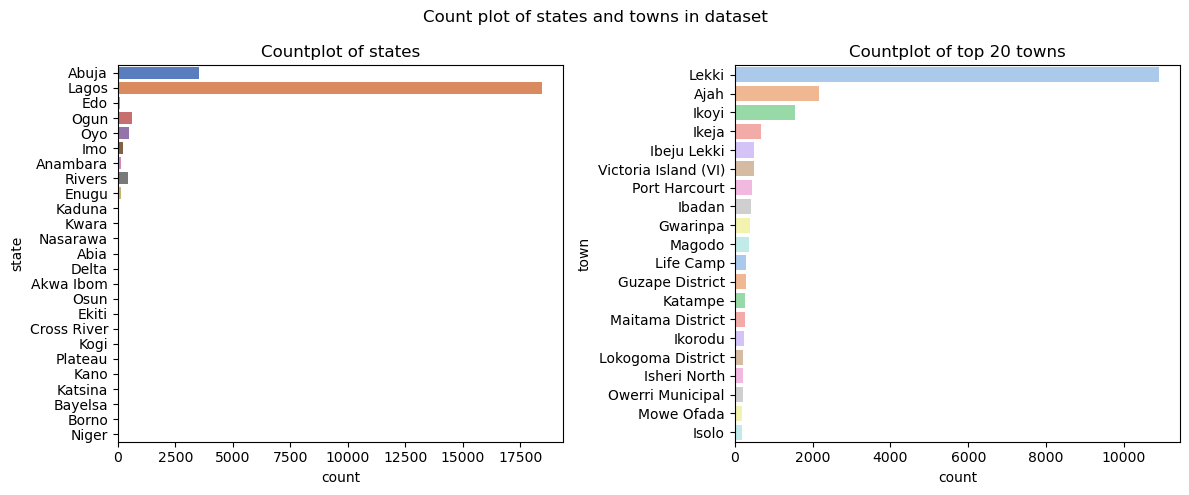

In [6]:
# Creating subplots
fig, (ax1, ax2) =  plt.subplots(1,2, figsize = (12,5))

# First subplot
sns.countplot(df["state"],ax = ax1, palette= "muted" )

# Second subplot
sns.countplot(df["town"],
              order= df["town"].value_counts().head(20).index, 
              palette= "pastel",
              ax = ax2 )

ax1.set_title("Countplot of states")
ax2.set_title("Countplot of top 20 towns")

plt.suptitle("Count plot of states and towns in dataset")

plt.tight_layout()
plt.show();

### Range of Price

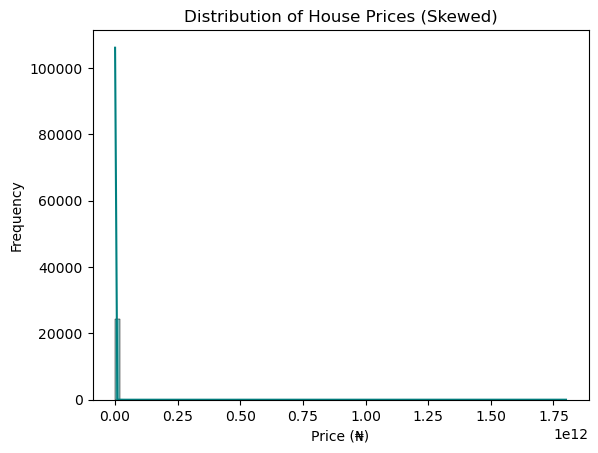

In [7]:
sns.histplot(df['price'], bins=100, kde=True, color='teal')
plt.title('Distribution of House Prices (Skewed)')
plt.xlabel('Price (₦)')
plt.ylabel('Frequency')
plt.show();


Here we can see

===

## Data Preprocessing

Here, we will deal with missing data and convert the data into a form that is understandable by the computer(numerical datatype). However, as shown above, there are no missing data in the dataset. So we will deal directly with data conversion here.

In [8]:
# Creating copy of the dataset
df_copy = df.copy()
df_copy.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


### Datatype Conversion( One Hot Encoding)
 One hot encoding will be performed on the "title" column.

In [9]:
# Looking at the unique values of title
df_copy["title"].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [10]:
# For loop performing one hot encoding

def one_hot_encoder(col):
    for title in df_copy[col].unique():
        df_copy[col +"_" + title] = df_copy[col].apply(lambda x:1 if x == title else 0)
    
one_hot_encoder("title")
df_copy.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,title_Detached Duplex,title_Terraced Duplexes,title_Semi Detached Duplex,title_Detached Bungalow,title_Block of Flats,title_Semi Detached Bungalow,title_Terraced Bungalow
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0,1,0,0,0,0,0,0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,0,1,0,0,0,0,0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,1,0,0,0,0,0,0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,1,0,0,0,0,0,0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,0,0,1,0,0,0,0


### Datatype Conversion (Ordinal Encoding)
 Ordinal Encoding will be performed on the "state" and "town" columns. But first, we need to examine the content of the town and state columns to check for mistakes.

In [11]:
# Group by town and count how many unique states each one is in

# Original grouping and identification of towns in multiple states
town_state_check = df.groupby('town')['state'].nunique()
towns_with_multiple_states = town_state_check[town_state_check > 1].index

# Filter the dataframe for just those problematic towns
duplicate_town_states = df[df['town'].isin(towns_with_multiple_states)][['town', 'state']]

# Drop duplicates and sort for clarity
duplicate_town_states = duplicate_town_states.drop_duplicates().sort_values(by='town')

# Group the towns and their associated states
towns_with_states = duplicate_town_states.groupby('town')['state'].unique()

print(f"Number of towns associated with multiple states: {len(towns_with_states)}")

Number of towns associated with multiple states: 31


In [12]:
towns_with_states

town
Agege                             [Anambara, Lagos]
Ajah                              [Lagos, Anambara]
Alimosho                          [Lagos, Anambara]
Arepo                              [Anambara, Ogun]
Gbagada                           [Anambara, Lagos]
Guzape District                   [Anambara, Abuja]
Gwarinpa                          [Anambara, Abuja]
Ibadan                              [Oyo, Anambara]
Ibeju Lekki                       [Lagos, Anambara]
Ifako-Ijaiye                      [Anambara, Lagos]
Ikeja                             [Anambara, Lagos]
Ikorodu                           [Lagos, Anambara]
Ikotun                            [Lagos, Anambara]
Ikoyi                             [Lagos, Anambara]
Isheri North                          [Ogun, Lagos]
Jabi                              [Abuja, Anambara]
Karu                    [Anambara, Abuja, Nasarawa]
Katampe                           [Anambara, Abuja]
Ketu                              [Lagos, Anambara]
Lekki  

We can see that there are 31 entries where towns apppear in multiple states simultaneously. After looking through them, we can see that they are clear mistakes. For example, Agege is a popular place in Lagos and Lokogoma is hilariously where I live in Abuja. We will now have to replace them with their correct states.

In [13]:
# Creating correct mapping for the towns with multiple states
town_mapping = {'Agege': "Lagos", 'Ajah': 'Lagos', 'Alimosho': 'Lagos', 'Arepo': 'Ogun', 'Gbagada': 'Lagos', 'Guzape District': 'Abuja',
              'Gwarinpa': 'Abuja', 'Ibadan': 'Oyo', 'Ibeju Lekki': 'Lagos', 'Ifako-Ijaiye': 'Lagos', 'Ikeja': 'Lagos', 'Ikorodu': 'Lagos',
              'Ikotun': 'Lagos', 'Ikoyi': 'Lagos', 'Isheri North': 'Lagos', 'Jabi': 'Abuja', 'Karu': 'Nasarawa', 'Katampe': 'Abuja', 'Ketu': 'Lagos',
              'Lekki': 'Lagos', 'Lokogoma District': "Abuja", 'Magboro': 'Ogun', 'Mbora (Nbora)': 'Abuja', 'Mowe Ofada': 'Ogun',
              'Mowe Town': 'Ogun', 'Ojo': 'Lagos', 'Owerri Municipal': 'Imo', 'Port Harcourt': 'Rivers', 'Shomolu': 'Lagos',
              'Victoria Island (VI)': "Lagos", 'Yaba': 'Lagos'}

# Apply correction mapping to towns with multiple states
mask = df['town'].isin(town_mapping.keys())
df.loc[mask, 'state'] = df.loc[mask, 'town'].map(town_mapping)

In [14]:
# Check corrections
corrected_town_states = df[df['town'].isin(town_mapping.keys())][['town', 'state']].drop_duplicates()
print("\nCorrected town-state pairs:")
print(corrected_town_states)


Corrected town-state pairs:
                      town     state
1                  Katampe     Abuja
2                    Lekki     Lagos
3                     Ajah     Lagos
10       Lokogoma District     Abuja
14    Victoria Island (VI)     Lagos
15              Mowe Ofada      Ogun
19                   Ikeja     Lagos
30                   Ikoyi     Lagos
40                Gwarinpa     Abuja
64             Ibeju Lekki     Lagos
71                    Yaba     Lagos
79            Ifako-Ijaiye     Lagos
80                   Agege     Lagos
83                 Ikorodu     Lagos
87                  Ibadan       Oyo
100        Guzape District     Abuja
108       Owerri Municipal       Imo
118           Isheri North     Lagos
130          Port Harcourt    Rivers
223               Alimosho     Lagos
275                Shomolu     Lagos
373              Mowe Town      Ogun
408                  Arepo      Ogun
451                 Ikotun     Lagos
627                Gbagada     Lagos
779      

Now that those mistakes have corrected, we can begin performing feature encoding on town and state

In [15]:
# Getting the unique values of the state column
df_copy["state"].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

In [16]:
df_copy.groupby("town")["price"].mean().sort_values(ascending= False).index

Index(['Ikoyi', 'Maitama District', 'Ifako-Ijaiye', 'Asokoro District',
       'Guzape District', 'Katampe', 'Dakibiyu', 'Apapa',
       'Victoria Island (VI)', 'Wuse 2',
       ...
       'Ibarapa North', 'Okpe', 'Imota', 'Kusada', 'Ede South', 'Jikwoyi',
       'Egbeda', 'Yewa South', 'Eko Atlantic City', 'Jos South'],
      dtype='object', name='town', length=189)

In [17]:
# Creating a function for feature encoding
category_mappings = {}

def feature_encoding(column):
    # Saving values in a variable in order of mean price
    col = df_copy.groupby(column)["price"].mean().sort_values(ascending= False).index
    
    # Use the variable to create a dictionary
    dict_column = {key:value for value,key in enumerate(col, 0)}
    
    # Saving the names for later use
    category_mappings[column] = {key:value for key,value in enumerate(col, 0)}
    
    # Use the dictionary to encode 
    df_copy[column] = df_copy[column].map(dict_column)

In [18]:
import joblib

joblib.dump(one_hot_encoder, "models/onehotencoder.pkl")

print("OneHotEncoder saved as onehot_encoder.pkl")

joblib.dump(feature_encoding, "models/ordinalencoding.pkl")

print("OrdinalEncoder saved as ordinal_encoder.pkl")

OneHotEncoder saved as onehot_encoder.pkl
OrdinalEncoder saved as ordinal_encoder.pkl


Now we can use this function to perform feature encoding on the "state" and "town" columns.

In [19]:
# Using the feature encoding function
feature_encoding("town")
feature_encoding("state")

### Dealing with outliers in price
Outliers affect the output of the data analysis and modelling so we will be taking care of them. As we could see during the describe() function, the highest value in the price feature is 1.2 trillion and the lowest is 90 thousand showing a massive skew in the dataset. So we will beginning with this feature.

<Axes: xlabel='price'>

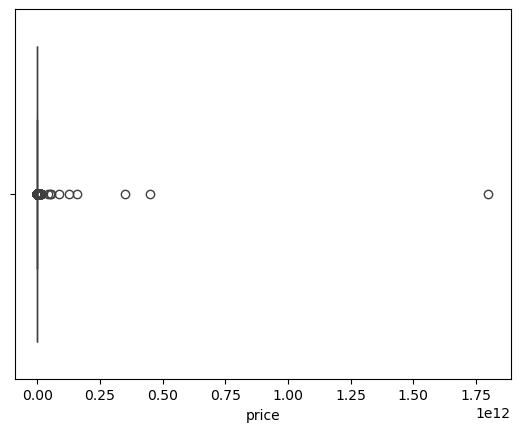

In [20]:
# Boxplot showing skewed price
sns.boxplot(df_copy["price"], orient= "h")

The boxplot

In [21]:
# We will be removing prices that fall into the range of the 1st and 99th percentile
Minimum = df_copy["price"].quantile(0.01)
Maximum = df_copy["price"].quantile(0.99)

outliers = df_copy[(df_copy["price"] < Minimum) | (df_copy["price"] > Maximum)]

df_copy.drop(outliers.index, axis= 0, inplace = True)

<Axes: xlabel='price'>

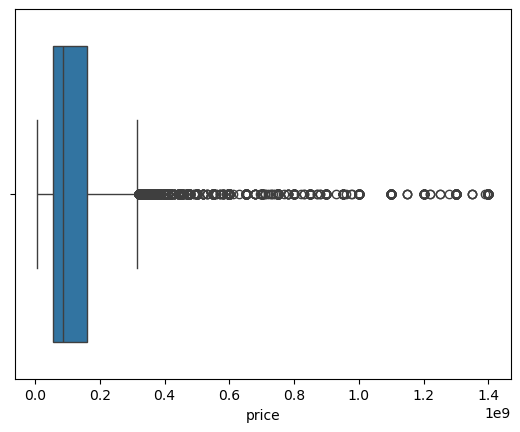

In [22]:
# Boxplot showing new data price
sns.boxplot(df_copy["price"], orient= "h")

The data is still very skewered, so we will be using the log transformation of the price instead.

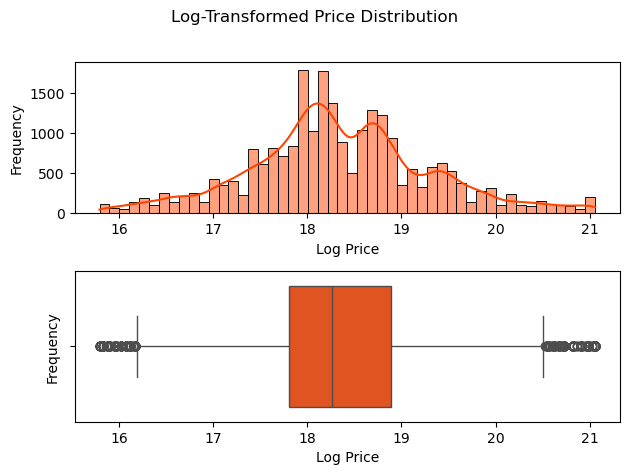

In [23]:
# Creating the log price feature
df_copy['log_price'] = np.log(df['price'])

# Plotting the log price feature
fig, (ax1, ax2) = plt.subplots(2,1)

# First plot: Histogram
sns.histplot(df_copy['log_price'], bins=50, kde=True, color='orangered', ax=ax1)
ax1.set_xlabel("Log Price")
ax1.set_ylabel("Frequency")

# Second plot:boxplot
sns.boxplot(df_copy["log_price"], orient= "h", ax= ax2, color='orangered')
ax2.set_xlabel("Log Price")
ax2.set_ylabel("Frequency")

plt.suptitle("Log-Transformed Price Distribution\n")
plt.tight_layout()
plt.show()

As we can see, the data is now more balanced and is no longer heavily skewed.

### Outliers in other features
When we used the describe() function on our dataset, it displayed the highest value of bathrooms, toilets and bedrooms as 9. This is a very high value and will need to be investigated

In [24]:
# Number of entries with high values in these
len(df_copy[(df_copy["bathrooms"] > 6) | (df_copy["toilets"] > 6) | (df_copy["bedrooms"] > 6) ])

2302

2402 data entries are a lot for them  all to be mistakes. So we will continue by investigating the features one by one.

In [25]:
# Irregular bathroom number
df_copy[(df_copy["bathrooms"] > 6) & (df_copy["bedrooms"] < 5)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,title_Detached Duplex,title_Terraced Duplexes,title_Semi Detached Duplex,title_Detached Bungalow,title_Block of Flats,title_Semi Detached Bungalow,title_Terraced Bungalow,log_price
511,4.0,7.0,7.0,4.0,Detached Duplex,1,1,750000000.0,1,0,0,0,0,0,0,20.435584
1428,4.0,8.0,5.0,6.0,Detached Duplex,77,1,83000000.0,1,0,0,0,0,0,0,18.234351
1577,4.0,7.0,8.0,4.0,Detached Duplex,15,0,160000000.0,1,0,0,0,0,0,0,18.890684
1715,4.0,7.0,7.0,7.0,Detached Duplex,91,13,45000000.0,1,0,0,0,0,0,0,17.622173
2510,3.0,8.0,8.0,4.0,Detached Duplex,38,0,80000000.0,1,0,0,0,0,0,0,18.197537


In [26]:
df_copy[(df_copy["bathrooms"] > 6) & (df_copy["toilets"] < 5)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,title_Detached Duplex,title_Terraced Duplexes,title_Semi Detached Duplex,title_Detached Bungalow,title_Block of Flats,title_Semi Detached Bungalow,title_Terraced Bungalow,log_price
183,9.0,9.0,1.0,1.0,Detached Duplex,54,0,70000000.0,1,0,0,0,0,0,0,18.064006
360,9.0,9.0,1.0,1.0,Detached Duplex,54,0,70000000.0,1,0,0,0,0,0,0,18.064006
366,9.0,9.0,1.0,8.0,Detached Duplex,15,0,250000000.0,1,0,0,0,0,0,0,19.336971
640,9.0,9.0,1.0,1.0,Detached Duplex,54,0,70000000.0,1,0,0,0,0,0,0,18.064006
648,9.0,9.0,1.0,1.0,Detached Duplex,1,1,700000000.0,1,0,0,0,0,0,0,20.366591


In [27]:
# Irregular bedroom number
df_copy[(df_copy["bedrooms"] > 6) & (df_copy["bathrooms"] < 5)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,title_Detached Duplex,title_Terraced Duplexes,title_Semi Detached Duplex,title_Detached Bungalow,title_Block of Flats,title_Semi Detached Bungalow,title_Terraced Bungalow,log_price
139,8.0,1.0,1.0,4.0,Detached Duplex,91,13,150000000.0,1,0,0,0,0,0,0,18.826146
449,8.0,1.0,1.0,4.0,Detached Duplex,3,1,750000000.0,1,0,0,0,0,0,0,20.435584
633,8.0,1.0,1.0,7.0,Detached Duplex,1,1,850000000.0,1,0,0,0,0,0,0,20.560747
1477,9.0,1.0,1.0,4.0,Detached Duplex,1,1,900000000.0,1,0,0,0,0,0,0,20.617905
1503,8.0,4.0,4.0,6.0,Detached Duplex,58,8,130000000.0,1,0,0,0,0,0,0,18.683045


In [28]:
df_copy[(df_copy["bedrooms"] > 6) & (df_copy["toilets"] < 5)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,title_Detached Duplex,title_Terraced Duplexes,title_Semi Detached Duplex,title_Detached Bungalow,title_Block of Flats,title_Semi Detached Bungalow,title_Terraced Bungalow,log_price
139,8.0,1.0,1.0,4.0,Detached Duplex,91,13,150000000.0,1,0,0,0,0,0,0,18.826146
183,9.0,9.0,1.0,1.0,Detached Duplex,54,0,70000000.0,1,0,0,0,0,0,0,18.064006
360,9.0,9.0,1.0,1.0,Detached Duplex,54,0,70000000.0,1,0,0,0,0,0,0,18.064006
366,9.0,9.0,1.0,8.0,Detached Duplex,15,0,250000000.0,1,0,0,0,0,0,0,19.336971
449,8.0,1.0,1.0,4.0,Detached Duplex,3,1,750000000.0,1,0,0,0,0,0,0,20.435584


In [29]:
# Irregular toilet number
df_copy[(df_copy["toilets"] > 6) & (df_copy["bedrooms"] < 5)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,title_Detached Duplex,title_Terraced Duplexes,title_Semi Detached Duplex,title_Detached Bungalow,title_Block of Flats,title_Semi Detached Bungalow,title_Terraced Bungalow,log_price
126,2.0,5.0,9.0,4.0,Detached Bungalow,65,0,30000000.0,0,0,0,1,0,0,0,17.216708
511,4.0,7.0,7.0,4.0,Detached Duplex,1,1,750000000.0,1,0,0,0,0,0,0,20.435584
882,3.0,5.0,7.0,2.0,Detached Bungalow,65,0,45000000.0,0,0,0,1,0,0,0,17.622173
1410,3.0,6.0,8.0,1.0,Block of Flats,91,13,30000000.0,0,0,0,0,1,0,0,17.216708
1577,4.0,7.0,8.0,4.0,Detached Duplex,15,0,160000000.0,1,0,0,0,0,0,0,18.890684


In [30]:
df_copy[(df_copy["toilets"] > 6) & (df_copy["bathrooms"] < 5)].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,title_Detached Duplex,title_Terraced Duplexes,title_Semi Detached Duplex,title_Detached Bungalow,title_Block of Flats,title_Semi Detached Bungalow,title_Terraced Bungalow,log_price
2798,6.0,1.0,9.0,1.0,Detached Duplex,3,1,350000000.0,1,0,0,0,0,0,0,19.673444
6834,8.0,4.0,8.0,8.0,Semi Detached Duplex,69,1,60000000.0,0,0,1,0,0,0,0,17.909855
7387,6.0,4.0,7.0,4.0,Detached Duplex,14,1,300000000.0,1,0,0,0,0,0,0,19.519293
8396,5.0,4.0,7.0,9.0,Detached Duplex,25,2,50000000.0,1,0,0,0,0,0,0,17.727534
15178,3.0,4.0,7.0,5.0,Detached Bungalow,20,0,70000000.0,0,0,0,1,0,0,0,18.064006


After one on one investigations, these have been determined as the irregular or illogical features from the entries. Hence we will proceed to drop these irregular entries and reduce the outliers

In [31]:
# Variable containing outliers
outliers = df_copy[(df_copy["bathrooms"] > 6) & (df_copy["bedrooms"] < 5) |
                   (df_copy["bathrooms"] > 6) & (df_copy["toilets"] < 5) |
                   (df_copy["bedrooms"] > 6) & (df_copy["bathrooms"] < 5) |
                   (df_copy["bedrooms"] > 6) & (df_copy["toilets"] < 5) |
                   (df_copy["toilets"] > 6) & (df_copy["bedrooms"] < 5) |
                   (df_copy["toilets"] > 6) & (df_copy["bathrooms"] < 5)]

# Dropping the outliers
df_copy.drop(outliers.index, axis= 0, inplace= True)

# Resetting index after dropping values
df_copy.reset_index(drop= True, inplace= True)
df_copy.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,title_Detached Duplex,title_Terraced Duplexes,title_Semi Detached Duplex,title_Detached Bungalow,title_Block of Flats,title_Semi Detached Bungalow,title_Terraced Bungalow,log_price
0,6.0,5.0,5.0,4.0,Detached Duplex,19,1,450000000.0,1,0,0,0,0,0,0,19.924758
1,4.0,5.0,5.0,4.0,Terraced Duplexes,5,1,800000000.0,0,1,0,0,0,0,0,20.500122
2,4.0,5.0,5.0,4.0,Detached Duplex,15,0,120000000.0,1,0,0,0,0,0,0,18.603002
3,4.0,4.0,5.0,6.0,Detached Duplex,38,0,40000000.0,1,0,0,0,0,0,0,17.504390
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,15,0,75000000.0,0,0,1,0,0,0,0,18.132999


===

## Data Analysis
 Now that the data has been preprocessed, we can use them to gain insights and create visualizations. 

### Distribution of States

<Axes: xlabel='count', ylabel='state'>

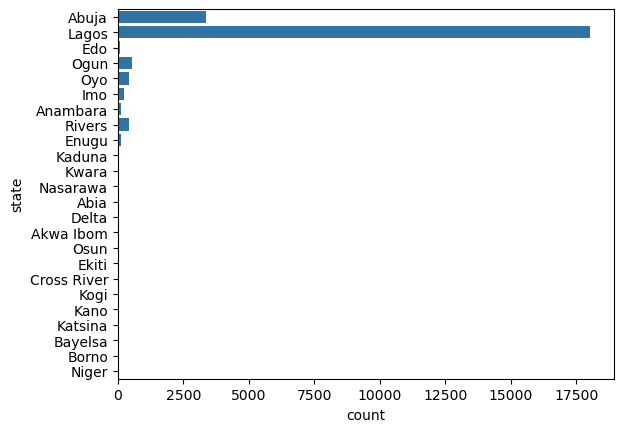

In [32]:
state_names = df_copy["state"].map(category_mappings["state"])
sns.countplot(state_names)

It seems the bulk of the data in this dataset contains houses from the state of Lagos.

### Mean Price of the Houses based on State, Town and Types of Houses.

In [33]:
# Compute mean price per state/town as a DataFrame
mean_states = df_copy.groupby('state')['price'].mean().reset_index()
mean_towns = df_copy.groupby("town")["price"].mean().reset_index()

# Map state codes to names using your mapping dictionary
mean_states['state_name'] = mean_states['state'].map(category_mappings["state"])
mean_towns['town_name'] = mean_towns['town'].map(category_mappings["town"])

# Sort values descending by mean price
mean_states = mean_states.sort_values(by='price', ascending=False)
mean_towns = mean_towns.sort_values(by='price', ascending= False)

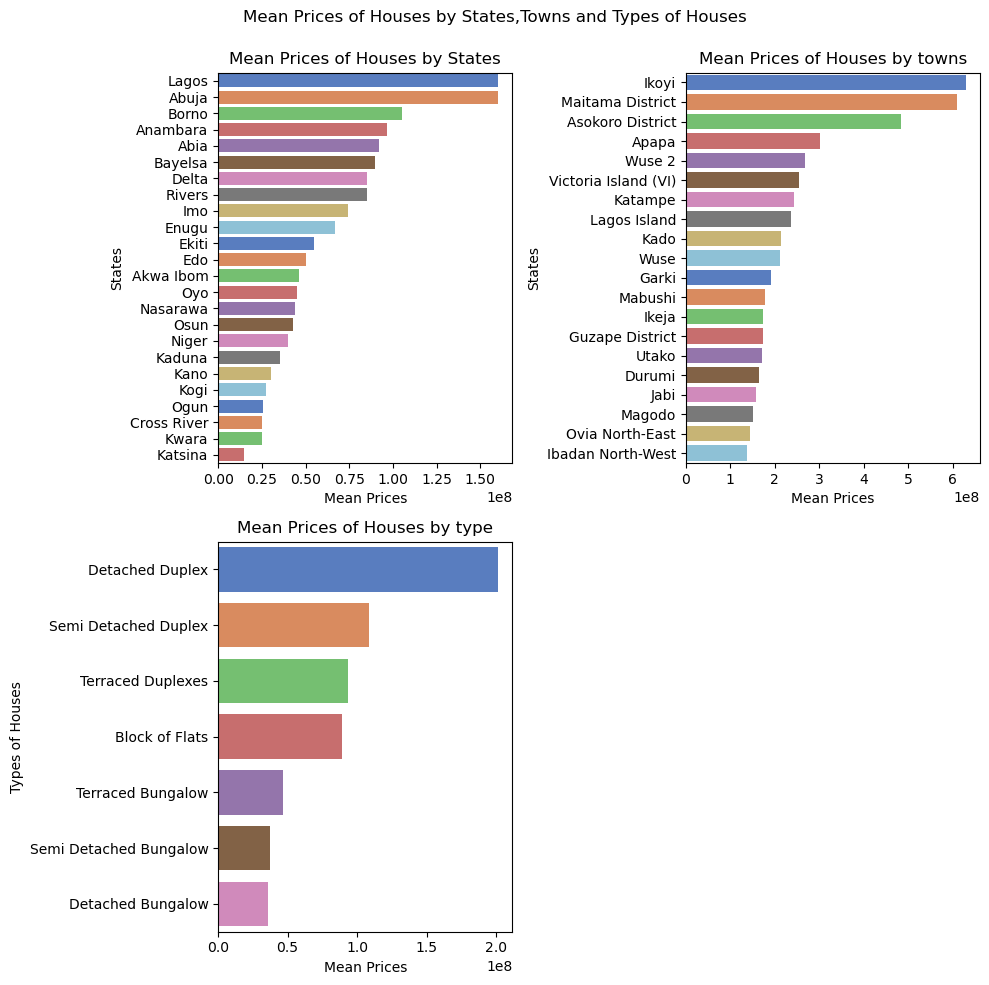

In [34]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

# First subplot
sns.barplot(mean_states, x= "price", y= "state_name", palette="muted", ax= axes[0,0])
axes[0,0].set_title("Mean Prices of Houses by States")
axes[0,0].set_xlabel("Mean Prices")
axes[0,0].set_ylabel("States")

# Second subplot
sns.barplot(mean_towns.head(20), x= "price", y= "town_name", palette="muted", ax= axes[0,1])
axes[0,1].set_title("Mean Prices of Houses by towns")
axes[0,1].set_xlabel("Mean Prices")
axes[0,1].set_ylabel("States")

# Third subplot
sns.barplot((df_copy.groupby("title")["price"].mean().reset_index().sort_values(by="price", ascending=False)), x="price", y="title",palette="muted", ax= axes[1,0])
axes[1,0].set_title("Mean Prices of Houses by type")
axes[1,0].set_xlabel("Mean Prices")
axes[1,0].set_ylabel("Types of Houses")

axes[1,1]. axis("off")
plt.suptitle("Mean Prices of Houses by States,Towns and Types of Houses\n")
plt.tight_layout()
plt.show();


 From the plot above, we can see the more expensive states, towns and types of houses to live in Nigeria. Lagos, Ikoyi and Detached Duplex are the most expensive respectively for housing in Nigeria. We can also see the cheapest states are Kwara and Katsina. The cheapest type of house in Nigeria, according to the dataset, seems to be a detached bungalow.

### Lagos VS Abuja
 Lagos and Abuja represent Nigeria's two most significant real estate markets. A very pertinent question in real estate remains which place is cheaper to live.

In [35]:
# Getting all the housing prices in Lagos and Abuja
lagos_prices = df_copy[df_copy["state"] == 0]
abuja_prices = df_copy[df_copy["state"] == 1]

# Mapping the towns of the states
lagos_prices["town"] = lagos_prices["town"].map(category_mappings["town"])
abuja_prices["town"] = abuja_prices["town"].map(category_mappings["town"])

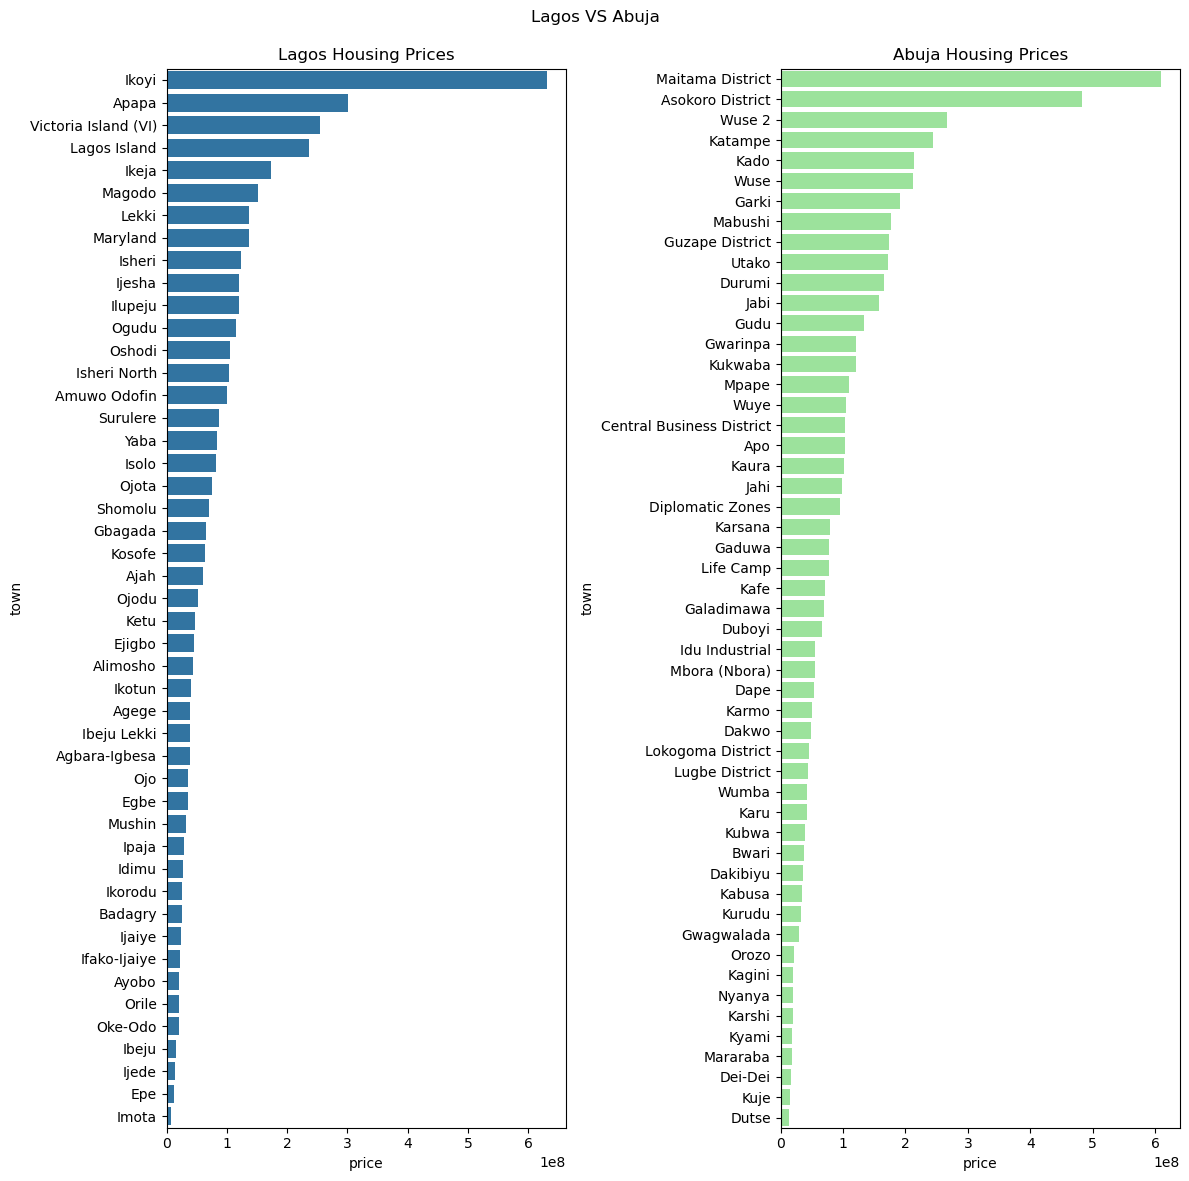

In [36]:
# Plotting Lagos VS Abuja
fig , (ax1, ax2) = plt.subplots(1,2, figsize = (12,12))

# Lagos
sns.barplot((lagos_prices.groupby("town")["price"].mean().reset_index().sort_values(by="price", ascending= False)), x= "price", y= "town", ax= ax1)
ax1.set_title("Lagos Housing Prices")

# Abuja
sns.barplot((abuja_prices.groupby("town")["price"].mean().reset_index().sort_values(by="price", ascending= False)), x= "price", y= "town", ax= ax2, color= "lightgreen")
ax2.set_title("Abuja Housing Prices")

plt.suptitle("Lagos VS Abuja\n")
plt.tight_layout()
plt.show();

 Lagos appears more expensive on average, but this is largely due to high-end areas like Ikoyi and Apapa skewing the numbers upward. Abuja shows more consistent pricing across different areas.

### Distribution of House Features

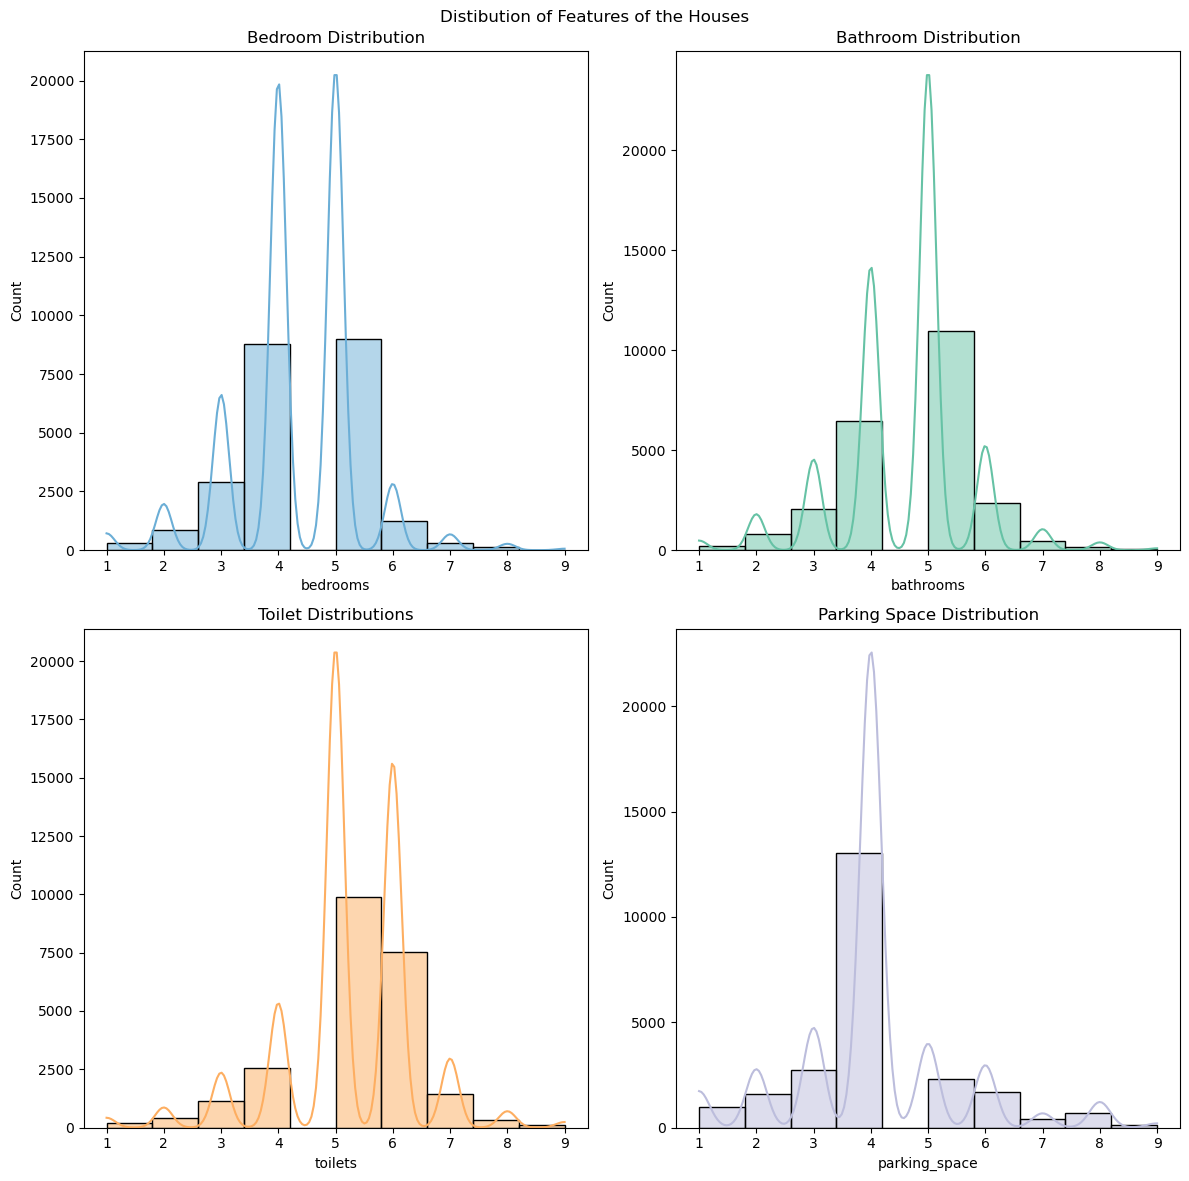

In [37]:
fig, axes = plt.subplots(2,2, figsize=(12,12))

# first subplot
sns.histplot(x=df_copy["bedrooms"], bins= 10, kde= True, ax = axes[0,0], color='#6baed6')
axes[0,0].set_title("Bedroom Distribution")

# second subplot
sns.histplot(x=df_copy["bathrooms"], bins= 10, kde= True, ax = axes[0,1], color='#66c2a5')
axes[0,1].set_title("Bathroom Distribution")

# first subplot
sns.histplot(x=df_copy["toilets"], bins= 10, kde= True, ax = axes[1,0], color= '#fdae61')
axes[1,0].set_title("Toilet Distributions")

# first subplot
sns.histplot(x=df_copy["parking_space"], bins= 10, kde= True, ax = axes[1,1], color='#bcbddc')
axes[1,1].set_title("Parking Space Distribution")

plt.suptitle("Distibution of Features of the Houses")
plt.tight_layout()
plt.show();

### Prices of Houses based on features of the house

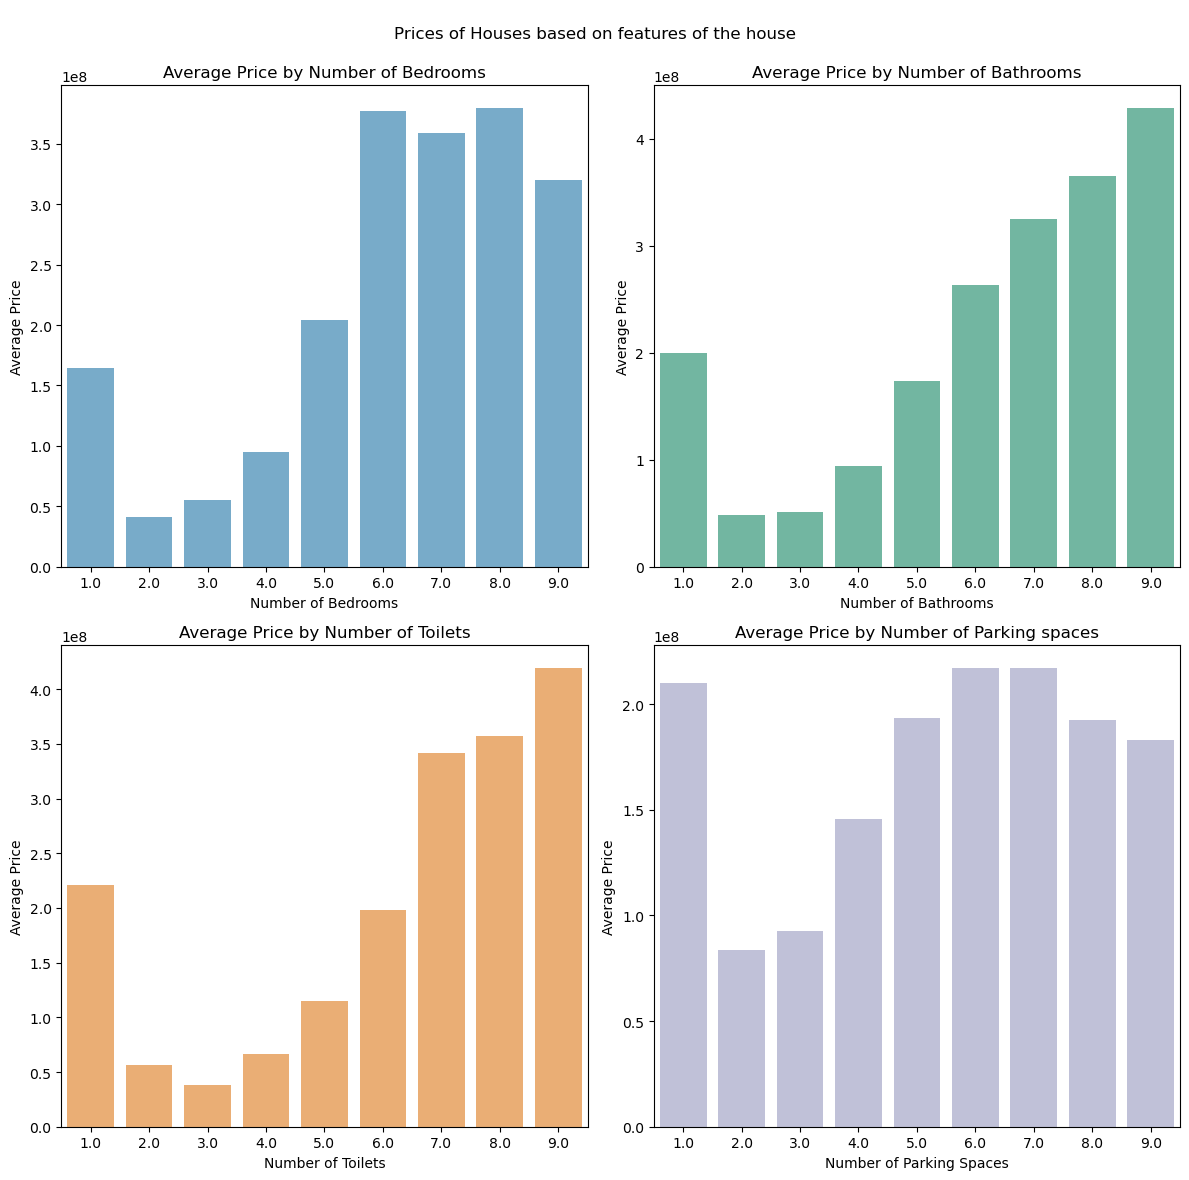

In [38]:
fig, axes = plt.subplots(2,2, figsize =(12,12))

# Bedrooms
sns.barplot((df_copy.groupby('bedrooms')['price'].mean().reset_index().sort_values(by="bedrooms", ascending=False)), x='bedrooms', y='price', ax = axes[0,0], color='#6baed6')
axes[0,0].set_title('Average Price by Number of Bedrooms')
axes[0,0].set_xlabel('Number of Bedrooms')
axes[0,0].set_ylabel('Average Price')

# Bathrooms
sns.barplot((df_copy.groupby('bathrooms')['price'].mean().reset_index().sort_values(by="bathrooms", ascending=False)), x='bathrooms', y='price', ax =axes[0,1], color='#66c2a5')
axes[0,1].set_title('Average Price by Number of Bathrooms')
axes[0,1].set_xlabel('Number of Bathrooms')
axes[0,1].set_ylabel('Average Price')

# Toilets
sns.barplot((df_copy.groupby('toilets')['price'].mean().reset_index().sort_values(by="toilets", ascending=False)), x='toilets', y='price', ax = axes[1,0], color= '#fdae61')
axes[1,0].set_title('Average Price by Number of Toilets')
axes[1,0].set_xlabel('Number of Toilets')
axes[1,0].set_ylabel('Average Price')

# Parking space
sns.barplot((df_copy.groupby('parking_space')['price'].mean().reset_index().sort_values(by="parking_space", ascending=False)), x='parking_space', y='price', ax = axes[1,1], color='#bcbddc')
axes[1,1].set_title('Average Price by Number of Parking spaces')
axes[1,1].set_xlabel('Number of Parking Spaces')
axes[1,1].set_ylabel('Average Price')

plt.suptitle("\nPrices of Houses based on features of the house\n")
plt.tight_layout()
plt.show()

Looking above, we can see the average prices of houses based on their different features(number of toilets, bedrrooms, bathrooms and parking spaces). It shows how differen

### What housing feature affects housing prices the most?

In [39]:
df_copy.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price', 'title_Detached Duplex', 'title_Terraced Duplexes',
       'title_Semi Detached Duplex', 'title_Detached Bungalow',
       'title_Block of Flats', 'title_Semi Detached Bungalow',
       'title_Terraced Bungalow', 'log_price'],
      dtype='object')

<Axes: >

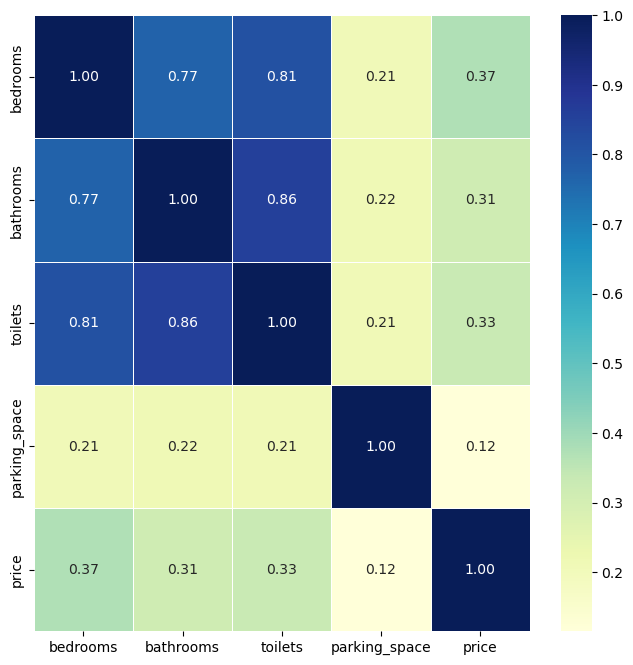

In [40]:
corr_drop = ['title', 'town', 'state', 'title_Detached Duplex', 'title_Terraced Duplexes',
             'title_Semi Detached Duplex', 'title_Detached Bungalow',
             'title_Block of Flats', 'title_Semi Detached Bungalow','title_Terraced Bungalow', 'log_price']

# Dropping all irrelevant columns
corr_matrix = (df_copy.drop(corr_drop, axis= 1)).corr()

# Plotting a correlation Matrix
fig,ax =plt.subplots(figsize = (8, 8))
sns.heatmap(corr_matrix,
            linewidths= 0.5,
            fmt= ".2f",
            cmap= "YlGnBu",
            annot= True)

We can take a look at the features that affect the price of houses the most. Using the correlation matrix above, we can see that the number of bedrooms affect the price of housing in Nigeria the most according to our dataset.

### State Relevance

In [41]:
category_mappings["state"]

{0: 'Lagos',
 1: 'Abuja',
 2: 'Rivers',
 3: 'Borno',
 4: 'Delta',
 5: 'Anambara',
 6: 'Abia',
 7: 'Bayelsa',
 8: 'Imo',
 9: 'Enugu',
 10: 'Ekiti',
 11: 'Edo',
 12: 'Akwa Ibom',
 13: 'Oyo',
 14: 'Niger',
 15: 'Osun',
 16: 'Nasarawa',
 17: 'Kaduna',
 18: 'Kano',
 19: 'Kogi',
 20: 'Cross River',
 21: 'Ogun',
 22: 'Kwara',
 23: 'Plateau',
 24: 'Katsina'}

### Correlation Matrix

<Axes: >

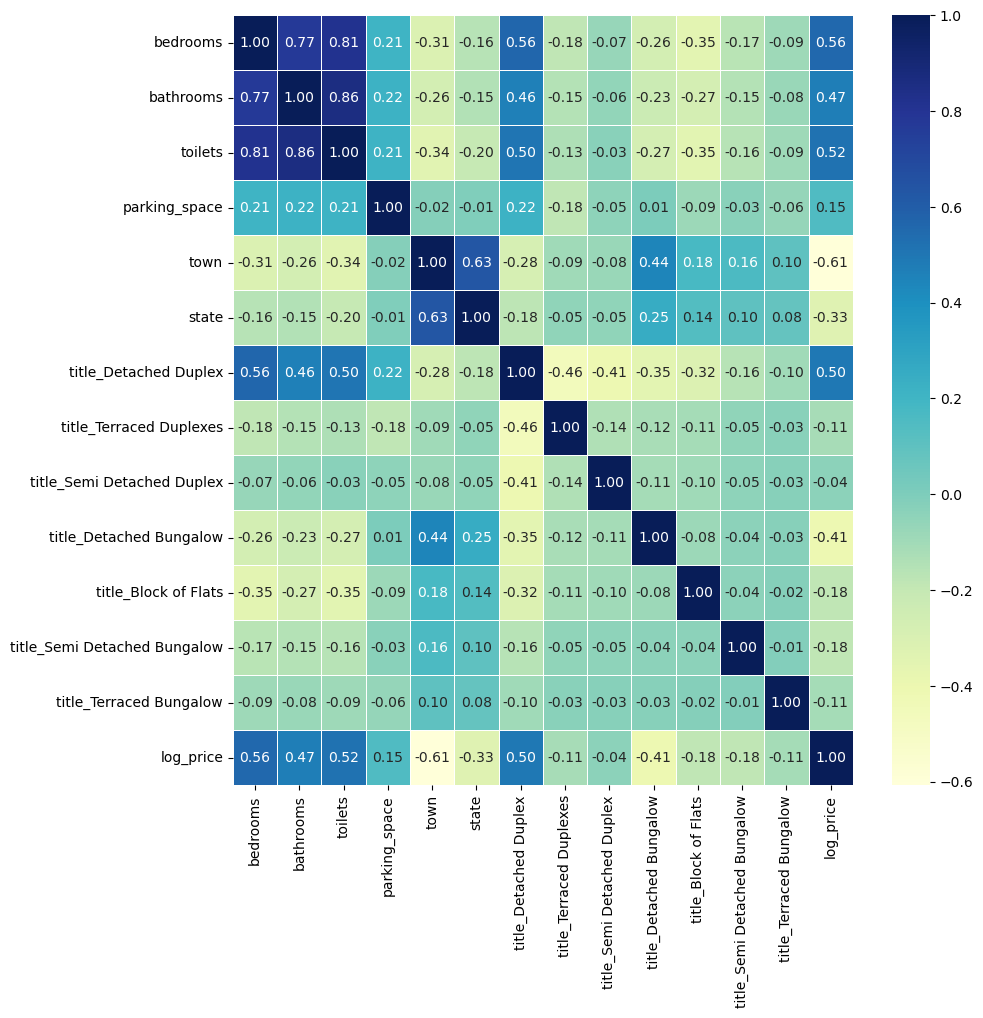

In [42]:
corr_drop = ["price", "title"]
corr_matrix = (df_copy.drop(corr_drop, axis= 1)).corr()
fig,ax =plt.subplots(figsize = (10, 10))
sns.heatmap(corr_matrix,
            linewidths= 0.5,
            fmt= ".2f",
            cmap= "YlGnBu",
            annot= True)

# Exporting Datasets

We will be getting a dataset of all the states and also of only Lagos 

In [43]:
df_copy.to_csv('dataset/preprocessed.csv', index=False)

In [44]:
df_Lagos = df_copy[df_copy["state"] == 0]
df_Lagos.to_csv("dataset/Lagos_Housing.csv", index= False)

# Conclusion

We have gained a lot of insights from this data analysis:
- The data in this dataset will be most useful for only housing in Lagos model over a model of housing in Nigeria as it is heavily outbalanced.
- It seems that generally, the most important feature in housing prices is the number of bedrooms.
- The most expensive state to live is Lagos
- The most expensive town to live in is Ikoyi
- The most expensive housing is Detached Duplex